# ML - Clustering

## Motivation

![Develop Countries](../images/developed_countries.png)

World map showing country classifications as per the IMF (International Monetary Fund) and the UN (United Nations) (last updated 2022).

- Blue: Developed countries
- Orange: Developing countries
- Red: Least developed countries
- Gray: Data unavailable

Most commonly, the criteria for evaluating the degree of economic development are gross domestic product (GDP), gross national product (GNP), the per capita income, level of industrialization, amount of widespread infrastructure and general standard of living.

Question: Can we categorize countries based on these features without having labels from the beginning? Why are there only three categories? 

Answer: Clustering! This is how we categorize elements without previous labels.

## K-means

- __Input:__ Feature matrix $X$ and a hyper-parameter $K$ that determine the number of clusters.
- __Output:__ Cluster centroids ($u_k$, $k=1, 2, \ldots, K$) and labels for each row of $X$ that indicate which cluster it belongs to.

$$
\begin{align*}
    \min_{C_k, \mu_k} \sum_{k=1}^K \sum_{x_i \in C_k} \left\lVert x_i - \mu_k \right\rVert^2_2
\end{align*}
$$

This is a NP-hard  problem (impossible to solve in polynomial time, the most difficult type of NP problem).

### LLoyd Algorithm

1. Compute the centroid of the cluster by averaging the positions of the elements currently in the cluster.
2. Update cluster label of the elements using the closest distance to each centroid.


In this case, one video is worth more than a thousand pictures.

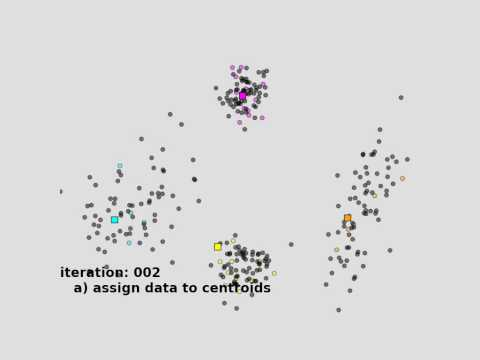

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("5I3Ei69I40s")

## Implementation

In [2]:
import numpy as np
import pandas as pd

from pathlib import Path

In [3]:
filepath = "https://raw.githubusercontent.com/aoguedao/neural_computing_workshop/main/data/gapminder.csv"
# filepath = Path().resolve().parent / "data" / "gapminder.csv"  # If you are running locally
data = pd.read_csv(filepath, usecols=[1, 5, 6])
data.head()

,country,life_exp,gdp_cap
0,Afghanistan,43.828,974.580338
1,Albania,76.423,5937.029526
2,Algeria,72.301,6223.367465
3,Angola,42.731,4797.231267
4,Argentina,75.320,12779.379640


In [4]:
from sklearn.cluster import KMeans

K = 3
kmeans = KMeans(n_clusters=K)
kmeans.fit(data.drop(columns="country"))

KMeans(n_clusters=3)

In [5]:
data["label"] = kmeans.labels_
data.head()

,country,life_exp,gdp_cap,label
0,Afghanistan,43.828,974.580338,1
1,Albania,76.423,5937.029526,1
2,Algeria,72.301,6223.367465,1
3,Angola,42.731,4797.231267,1
4,Argentina,75.320,12779.379640,2


In [6]:
data.query("label == 2")

,country,life_exp,gdp_cap,label
4,Argentina,75.320,12779.379640,2
13,Botswana,50.728,12569.851770,2
14,Brazil,72.390,9065.800825,2
15,Bulgaria,73.005,10680.792820,2
23,Chile,78.553,13171.638850,2
29,Costa Rica,78.782,9645.061420,2
31,Croatia,75.748,14619.222720,2
32,Cuba,78.273,8948.102923,2
33,Czech Republic,76.486,22833.308510,2
40,Equatorial Guinea,51.579,12154.089750,2


In [7]:
data.query("label == 1")

,country,life_exp,gdp_cap,label
0,Afghanistan,43.828,974.580338,1
1,Albania,76.423,5937.029526,1
2,Algeria,72.301,6223.367465,1
3,Angola,42.731,4797.231267,1
8,Bangladesh,64.062,1391.253792,1
...,...,...,...,...
137,Vietnam,74.249,2441.576404,1
138,West Bank and Gaza,73.422,3025.349798,1
139,"Yemen, Rep.",62.698,2280.769906,1
140,Zambia,42.384,1271.211593,1


In [8]:
data.query("label == 0")

,country,life_exp,gdp_cap,label
5,Australia,81.235,34435.36744,0
6,Austria,79.829,36126.49270,0
7,Bahrain,75.635,29796.04834,0
9,Belgium,79.441,33692.60508,0
20,Canada,80.653,36319.23501,0
34,Denmark,78.332,35278.41874,0
43,Finland,79.313,33207.08440,0
44,France,80.657,30470.01670,0
47,Germany,79.406,32170.37442,0
49,Greece,79.483,27538.41188,0


### Another Example

We can compress images using clustering by reducing the number of bytes.

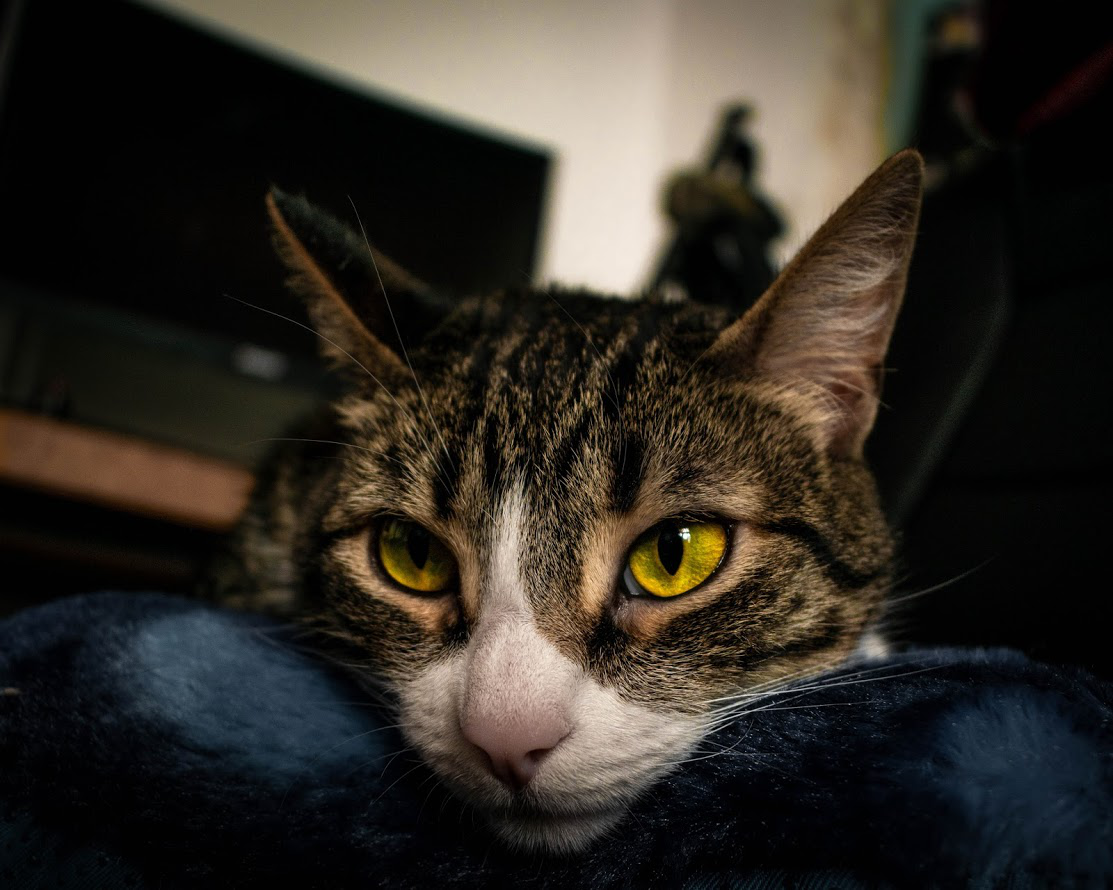

In [9]:
from PIL import Image
import requests

url = "https://raw.githubusercontent.com/aoguedao/neural_computing_workshop/main/images/coyoya.jpg"
im_filapath = requests.get(url,stream=True).raw
# im_filepath = Path().resolve().parent / "images" / "coyoya.jpg"  # If you are running locally
im = Image.open(im_filapath)
im

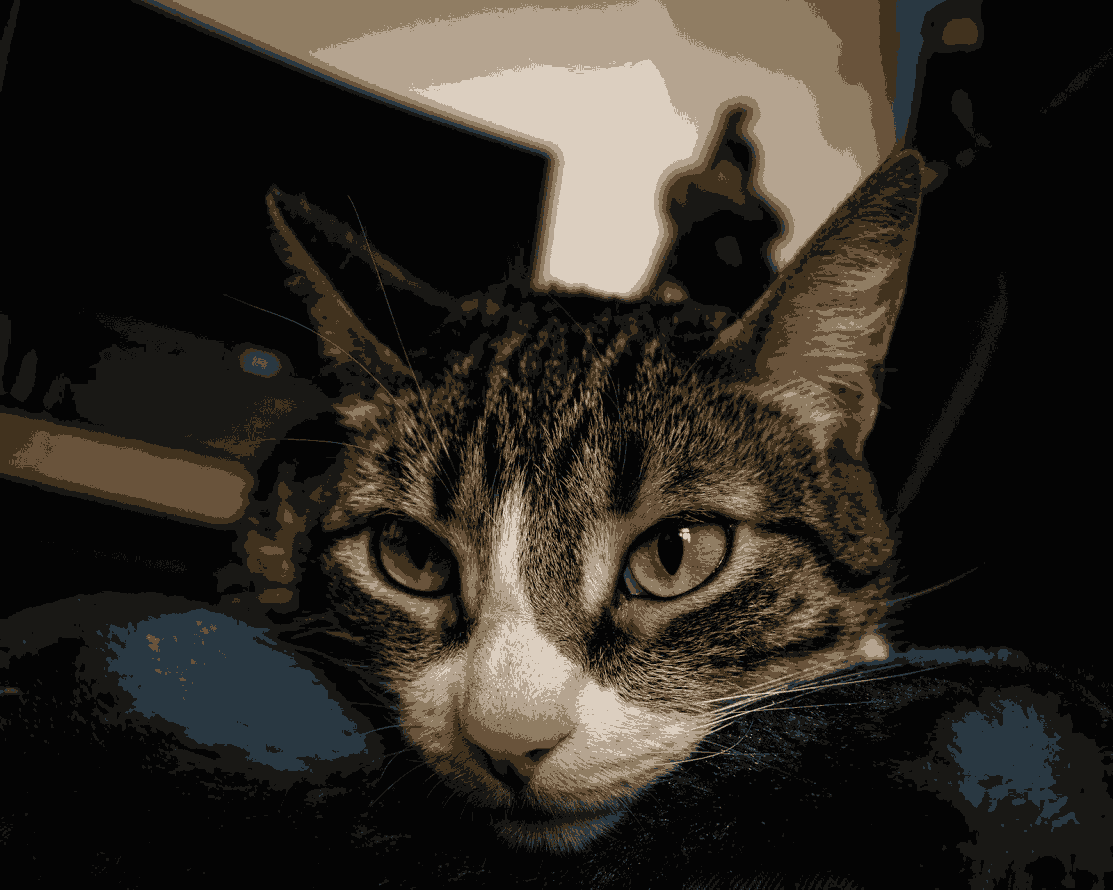

In [10]:
K = 8  # Number of clusters
X = np.array(im.getdata())  # Array with image values
kmeans = KMeans(n_clusters=K)
kmeans.fit(X)
compressed_array = kmeans.cluster_centers_[kmeans.predict(X)]  # Prediction 
im_compressed = compressed_array.astype(np.uint8).reshape(im.size[1], im.size[0], 3)  # New image
Image.fromarray(im_compressed, mode="RGB")